In [2]:
#Unsupervised Learning - K means or Hirerachial Clustering
#Read the data file and check for any missing values
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
fmcg_dataset = pd.read_csv('Project_Data_1.csv', index_col = 0, thousands  = ',')
existing_df = fmcg_dataset

In [3]:
#Change the headers to country and year accordingly
existing_df.index.names = ['country']
existing_df.columns.names = ['year']
existing_df

year,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007
country,,,,,,,,,,,,,,,,,,
Afghanistan,436,429,422,415,407,397,397,387,374,373,346,326,304,308,283,267,251,238
Albania,42,40,41,42,42,43,42,44,43,42,40,34,32,32,29,29,26,22
Algeria,45,44,44,43,43,42,43,44,45,46,48,49,50,51,52,53,55,56
American Samoa,42,14,4,18,17,22,0,25,12,8,8,6,5,6,9,11,9,5
Andorra,39,37,35,33,32,30,28,23,24,22,20,20,21,18,19,18,17,19
Angola,514,514,513,512,510,508,512,363,414,384,530,335,307,281,318,331,302,294
Anguilla,38,38,37,37,36,35,35,36,36,36,35,35,35,35,35,34,34,34
Antigua and Barbuda,16,15,15,14,13,12,12,11,11,9,8,9,7,9,8,8,9,9
Argentina,96,91,86,82,78,74,71,67,63,58,52,51,42,41,39,39,37,35


In [4]:
#Cleanse the data if required and remove null or blank values
existing_df = existing_df.dropna(axis=1, how='all')
existing_df

year,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007
country,,,,,,,,,,,,,,,,,,
Afghanistan,436,429,422,415,407,397,397,387,374,373,346,326,304,308,283,267,251,238
Albania,42,40,41,42,42,43,42,44,43,42,40,34,32,32,29,29,26,22
Algeria,45,44,44,43,43,42,43,44,45,46,48,49,50,51,52,53,55,56
American Samoa,42,14,4,18,17,22,0,25,12,8,8,6,5,6,9,11,9,5
Andorra,39,37,35,33,32,30,28,23,24,22,20,20,21,18,19,18,17,19
Angola,514,514,513,512,510,508,512,363,414,384,530,335,307,281,318,331,302,294
Anguilla,38,38,37,37,36,35,35,36,36,36,35,35,35,35,35,34,34,34
Antigua and Barbuda,16,15,15,14,13,12,12,11,11,9,8,9,7,9,8,8,9,9
Argentina,96,91,86,82,78,74,71,67,63,58,52,51,42,41,39,39,37,35


In [ ]:
#Implement K means clustering
Unsuperviced Learning - K means Clustering

In [5]:
#Apply PCA
from sklearn.decomposition import PCA
pca = PCA()

In [6]:
#Number of principal components which explain nearly all the variance
pca = pca.fit(existing_df)
print('Number of Components:', pca.n_components_)

Number of Components: 18


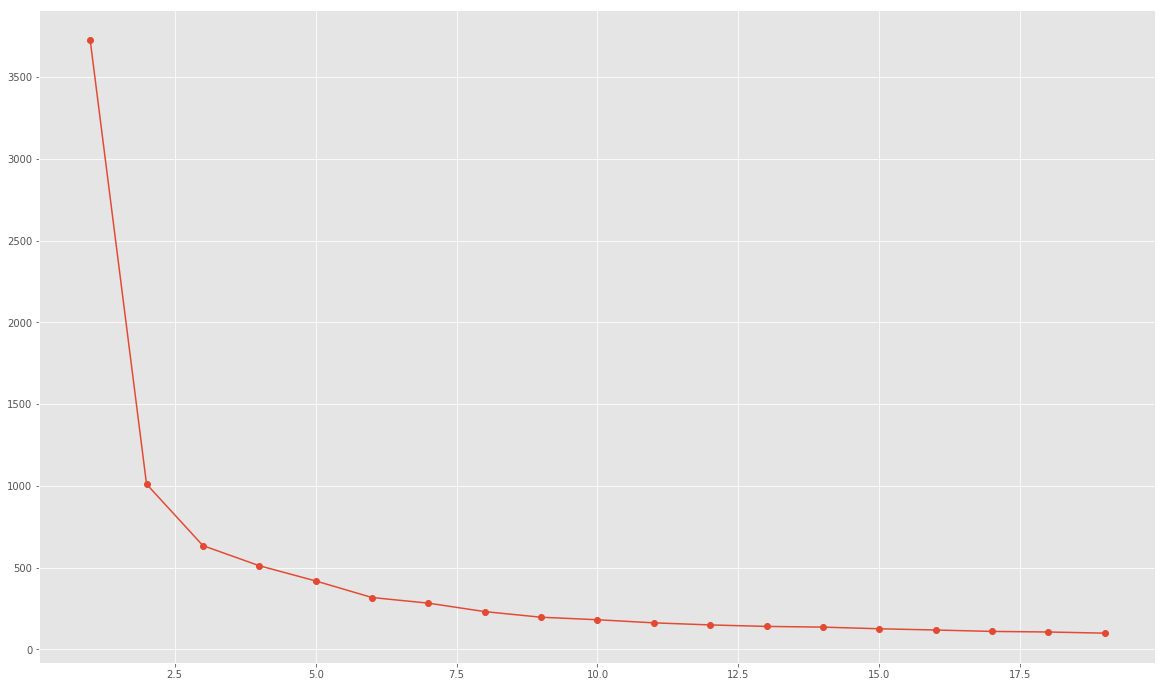

In [7]:
#Plot elbow chart or scree plot to find out optimal number of clusters.
#optimal number of clusters can be 1 or 2 because the downfall can be observed at those points 
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
existing_df_scaled = scaler.fit_transform( existing_df )
cluster_range = range( 1, 20 )
cluster_errors = []

for num_clusters in cluster_range:
    clusters = KMeans( num_clusters )
    clusters.fit( existing_df_scaled )
    cluster_errors.append( clusters.inertia_ )
clusters_df = pd.DataFrame( { "num_clusters":cluster_range, "cluster_errors": cluster_errors } )
clusters_df[0:10]
plt.figure(figsize=(20,12))
plt.plot( clusters_df.num_clusters, clusters_df.cluster_errors, marker = "o" )

In [8]:
#PCA Transformation
pca = PCA(n_components=2)
pca = pca.fit(existing_df)
existing_2d = pca.transform(existing_df)
existing_df_2d = pd.DataFrame(existing_2d)
existing_df_2d.index = existing_df.index
existing_df_2d.columns = ['PC1','PC2']
existing_df_2d

,PC1,PC2
country,,
Afghanistan,732.215864,203.381494
Albania,-613.296510,4.715978
Algeria,-569.303713,-36.837051
American Samoa,-717.082766,5.464696
Andorra,-661.802241,11.037736
Angola,990.536338,294.243725
Anguilla,-618.891169,-14.502928
Antigua and Barbuda,-723.656796,-5.371258
Argentina,-508.244158,61.039700


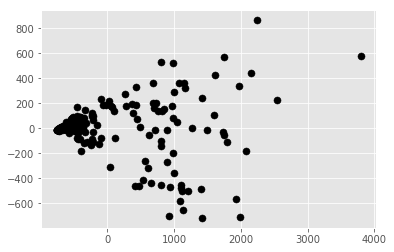

In [9]:
#Plot - PCA data
import numpy as np
f1 = existing_df_2d['PC1'].values
f2 = existing_df_2d['PC2'].values
X = np.array(list(zip(f1, f2)))
plt.scatter(f1, f2, c = 'black', s=50)

In [10]:
#Euclidean distance calculator
def dist(a,b, ax =1):
    return np.linalg.norm(a-b,axis = ax)
#Number of clusters
k =2
#X coordinates of random centroids
C_x = np.random.randint(0, np.max(X)-20, size = k)
#Y coordinates of random centroids
C_y = np.random.randint(0, np.max(X)-20, size = k)
C = np.array(list(zip(C_x, C_y)),dtype = np.float32)
print(C)

[[ 1734.  2285.]
 [  143.   833.]]


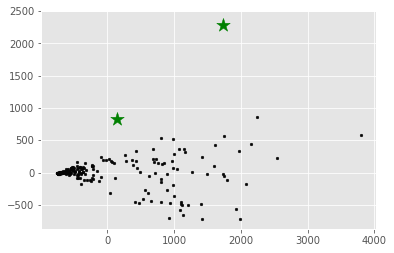

In [11]:
#plotting along with the Centroids
plt.scatter(f1,f2, c = '#050505', s = 7)
plt.scatter(C_x, C_y, marker ='*', s = 200, c = 'g')

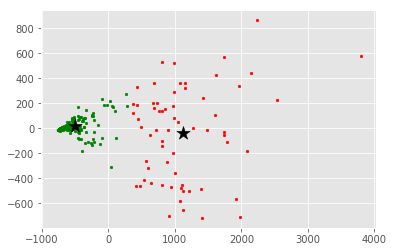

In [12]:
from copy import deepcopy
# To store the value of centroids when it updates
C_old = np.zeros(C.shape)
# Cluster Lables(0, 1, 2)
clusters = np.zeros(len(X))
# Error func. - Distance between new centroids and old centroids
error = dist(C, C_old, None)
# Loop will run till the error becomes zero
while error != 0:
    # Assigning each value to its closest cluster
    for i in range(len(X)):
        distances = dist(X[i], C)
        cluster = np.argmin(distances)
        clusters[i] = cluster
    # Storing the old centroid values
    C_old = deepcopy(C)
    # Finding the new centroids by taking the average value
    for i in range(k):
        points = [X[j] for j in range(len(X)) if clusters[j] == i]
        C[i] = np.mean(points, axis=0)
    error = dist(C, C_old, None)

colors = ['r', 'g', 'b', 'y', 'c', 'm']
fig, ax = plt.subplots()
for i in range(k):
        points = np.array([X[j] for j in range(len(X)) if clusters[j] == i])
        ax.scatter(points[:, 0], points[:, 1], s=7, c=colors[i])
ax.scatter(C[:, 0], C[:, 1], marker='*', s=200, c='#050505')

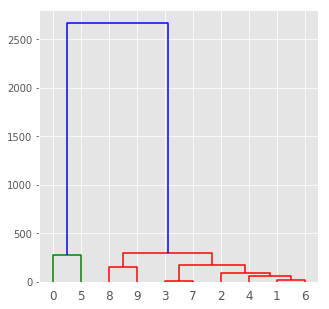

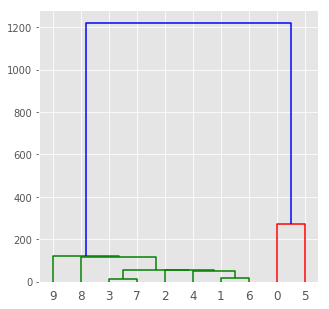

In [13]:
#Hierarchical clustering
from scipy.cluster.hierarchy import dendrogram, linkage
from matplotlib import pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd
plt.rcParams['figure.figsize'] = (5,5)
plt.style.use('ggplot')
f1 = existing_df_2d['PC1'].values
f2 = existing_df_2d['PC2'].values
fb = f1[0:10]
fg = f2[0:10]
X = np.array(list(zip(fb, fg)))
Z = linkage(X, 'ward')
fig = plt.figure(figsize = (5,5))
dn = dendrogram(Z)
Z = linkage(X, 'single')
fig = plt.figure(figsize = (5,5))
dn = dendrogram(Z)
plt.show()